<a href="https://colab.research.google.com/github/ArturPap/Sentiment-analysis-in-social-media-using-NLP/blob/main/Sentiment_analysis_in_social_media_using_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 29.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 72.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlink

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Przykładowe dane:
                                      text
0     I love this new phone, it's amazing!
1   Terrible service, I'm so disappointed.
2     The movie was okay, nothing special.
3  Fantastic weather today, feeling great!
4  This product is a total waste of money.
5          Pretty good experience overall.

Dane po preprocessingu:
                                      text  \
0     I love this new phone, it's amazing!   
1   Terrible service, I'm so disappointed.   
2     The movie was okay, nothing special.   
3  Fantastic weather today, feeling great!   
4  This product is a total waste of money.   
5          Pretty good experience overall.   

                            cleaned_text  
0                 love new phone amazing  
1       terrible service im disappointed  
2             movie okay nothing special  
3  fantastic weather today feeling great  
4              product total waste money  
5         pretty good experience overall  


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu



Dane z analizą sentymentu:
                                      text  \
0     I love this new phone, it's amazing!   
1   Terrible service, I'm so disappointed.   
2     The movie was okay, nothing special.   
3  Fantastic weather today, feeling great!   
4  This product is a total waste of money.   
5          Pretty good experience overall.   

                            cleaned_text textblob_sentiment hf_sentiment  
0                 love new phone amazing           Positive     Positive  
1       terrible service im disappointed           Negative     Negative  
2             movie okay nothing special           Positive     Negative  
3  fantastic weather today feeling great           Positive     Positive  
4              product total waste money           Negative     Negative  
5         pretty good experience overall           Positive     Positive  


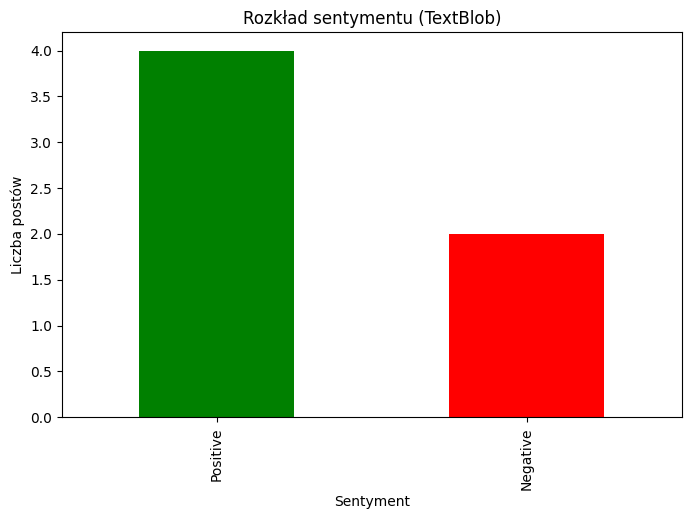

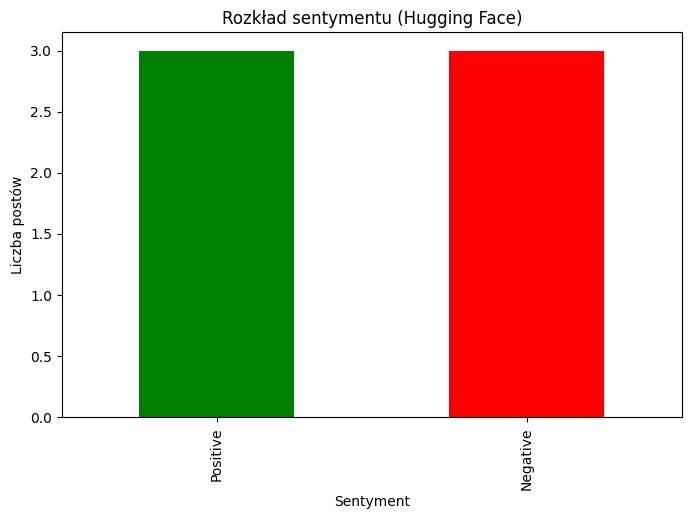


Najczęściej występujące słowa:
love: 1
new: 1
phone: 1
amazing: 1
terrible: 1
service: 1
im: 1
disappointed: 1
movie: 1
okay: 1


<Figure size 1000x600 with 0 Axes>

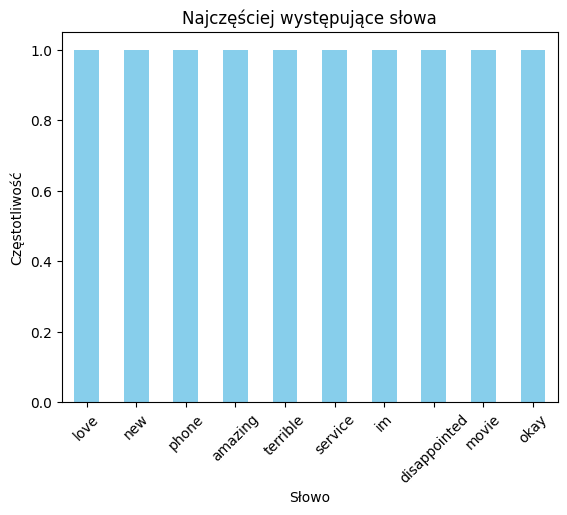


Wpisz tekst do analizy sentymentu: funny
TextBlob: Positive
Hugging Face: Positive


In [1]:
# Instalacja bibliotek
!pip install pandas matplotlib textblob transformers torch

# Importowanie bibliotek
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob
from transformers import pipeline
import re
import nltk
from nltk.corpus import stopwords
from collections import Counter
nltk.download('stopwords')

# Przykładowe dane
data = {
    'text': [
        "I love this new phone, it's amazing!",
        "Terrible service, I'm so disappointed.",
        "The movie was okay, nothing special.",
        "Fantastic weather today, feeling great!",
        "This product is a total waste of money.",
        "Pretty good experience overall."
    ]
}
df = pd.DataFrame(data)
print("Przykładowe dane:")
print(df)

# Preprocessing
stop_words = set(stopwords.words('english'))
def clean_text(text):
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'[^A-Za-z\s]', '', text)
    text = text.lower()
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text

df['cleaned_text'] = df['text'].apply(clean_text)
print("\nDane po preprocessingu:")
print(df)

# Analiza sentymentu
def get_textblob_sentiment(text):
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['textblob_sentiment'] = df['cleaned_text'].apply(get_textblob_sentiment)
sentiment_pipeline = pipeline('sentiment-analysis', model='distilbert-base-uncased-finetuned-sst-2-english')
df['hf_sentiment'] = df['text'].apply(lambda x: sentiment_pipeline(x)[0]['label'].capitalize())
print("\nDane z analizą sentymentu:")
print(df)

# Wizualizacja
plt.figure(figsize=(8, 5))
df['textblob_sentiment'].value_counts().plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Rozkład sentymentu (TextBlob)')
plt.xlabel('Sentyment')
plt.ylabel('Liczba postów')
plt.show()

plt.figure(figsize=(8, 5))
df['hf_sentiment'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title('Rozkład sentymentu (Hugging Face)')
plt.xlabel('Sentyment')
plt.ylabel('Liczba postów')
plt.show()

# Analiza słów kluczowych
all_text = ' '.join(df['cleaned_text'])
words = all_text.split()
word_freq = Counter(words).most_common(10)
print("\nNajczęściej występujące słowa:")
for word, freq in word_freq:
    print(f"{word}: {freq}")

words_df = pd.DataFrame(word_freq, columns=['word', 'frequency'])
plt.figure(figsize=(10, 6))
words_df.plot(kind='bar', x='word', y='frequency', legend=False, color='skyblue')
plt.title('Najczęściej występujące słowa')
plt.xlabel('Słowo')
plt.ylabel('Częstotliwość')
plt.xticks(rotation=45)
plt.show()

# Interfejs tekstowy
user_text = input("\nWpisz tekst do analizy sentymentu: ")
cleaned_user_text = clean_text(user_text)
textblob_result = get_textblob_sentiment(cleaned_user_text)
hf_result = sentiment_pipeline(user_text)[0]['label'].capitalize()
print(f"TextBlob: {textblob_result}")
print(f"Hugging Face: {hf_result}")